In [225]:
import pandas as pd
import numpy as np

train = pd.read_csv("/content/drive/MyDrive/colab_data/Dscover 가이드 프로젝트/train_data_수정.csv")
test = pd.read_csv("/content/drive/MyDrive/colab_data/Dscover 가이드 프로젝트/test_data_수정.csv")
df = pd.concat([train, test])
df = df.drop(columns=['education.num'])

### capital.gain 이상치 처리

In [178]:
median_non_zero = df['capital.gain'][df['capital.gain'] != 0].median()
median_non_zero

7298.0

<AxesSubplot:>

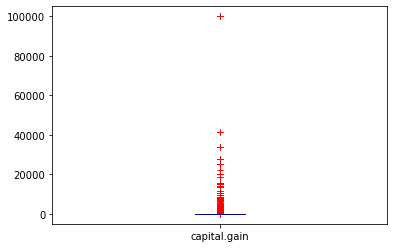

In [ ]:
color={'medians': 'DarkBlue', 'caps': 'red'}
df['capital.gain'].plot.box(color=color, sym='r+' )

<AxesSubplot:xlabel='capital.gain', ylabel='Frequency'>

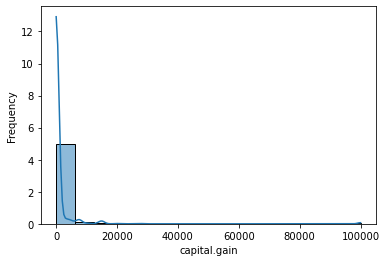

In [ ]:
sns.histplot(df['capital.gain'], kde=True, stat="frequency")

In [226]:
#중앙값:0 #3분위수:0 #41311~99998 사이의 값이 없음 # 99999인 값 159개(0.488%) 결측치로 판단 #결측치 중앙값으로 대체
df['capital.gain'].replace(99999,7298,inplace=True)

<AxesSubplot:>

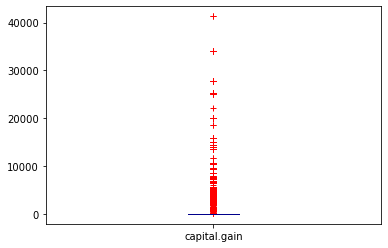

In [ ]:
color={'medians': 'DarkBlue', 'caps': 'red'}
df['capital.gain'].plot.box(color=color, sym='r+' )

<AxesSubplot:xlabel='capital.gain', ylabel='Frequency'>

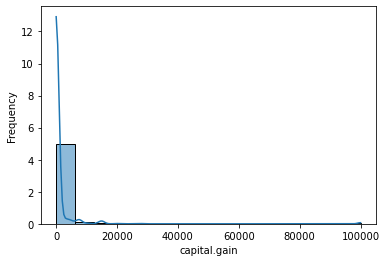

In [ ]:
sns.histplot(df['capital.gain'], kde=True, stat="frequency")

In [ ]:
ks_statistic, p_value = stats.kstest(df['capital.gain'], 'norm')
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")
#정규분포를 따르지않음

KS Statistic: 0.5, p-value: 0.0


In [ ]:
ad_statistic, critical_values, significance_level = stats.anderson(df['capital.gain'], dist='norm')

print(f"AD Statistic: {ad_statistic}")

# 유의 수준에 따른 해석
for i in range(len(critical_values)):
    sig_level = significance_level[i]
    crit_val = critical_values[i]
    if ad_statistic < crit_val:
        print(f"At significance level {sig_level}, null hypothesis is not rejected (data follows normal distribution).")
    else:
        print(f"At significance level {sig_level}, null hypothesis is rejected (data does not follow normal distribution).")

AD Statistic: 10355.863518387705
At significance level 15.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 10.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 5.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 2.5, null hypothesis is rejected (data does not follow normal distribution).
At significance level 1.0, null hypothesis is rejected (data does not follow normal distribution).


<Axes: xlabel='capital.gain.boxcox', ylabel='Frequency'>

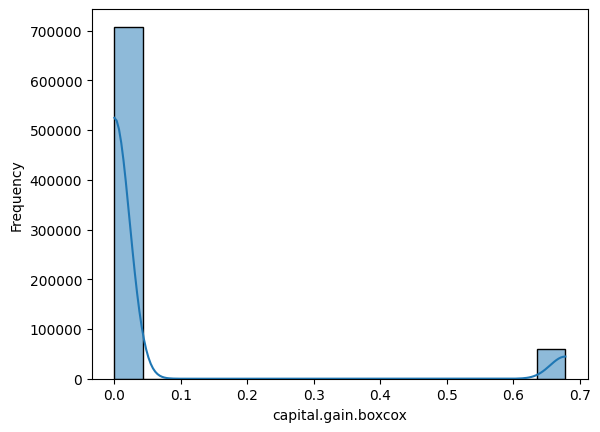

In [227]:
# Box-Cox 변환
import seaborn as sns
from scipy import stats
transformed_data, lambda_value = stats.boxcox(df['capital.gain'].replace(0,1))
df['capital.gain.boxcox']=transformed_data
sns.histplot(df['capital.gain.boxcox'], kde=True, stat="frequency")

### capital.loss 이상치 처리

0.0
2712
11.006268436578171


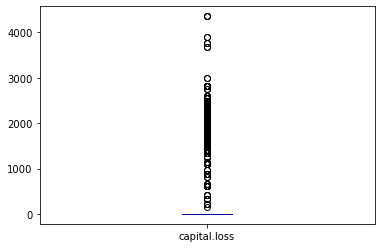

In [ ]:
color={'medians': 'DarkBlue', 'caps': 'red'}
df['capital.loss'].plot.box(color=color)

<AxesSubplot:xlabel='capital.loss', ylabel='Frequency'>

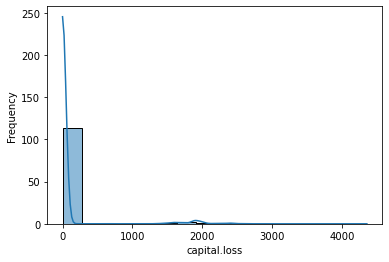

In [ ]:
sns.histplot(df['capital.loss'], kde=True, stat="frequency")

In [ ]:
df['capital.loss'].quantile(0.75)

0.0

In [ ]:
ks_statistic, p_value = stats.kstest(df['capital.loss'], 'norm')
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")
#정규분포를 따르지않음

KS Statistic: 0.5, p-value: 0.0


In [ ]:
ad_statistic, critical_values, significance_level = stats.anderson(df['capital.loss'], dist='norm')

print(f"AD Statistic: {ad_statistic}")

# 유의 수준에 따른 해석
for i in range(len(critical_values)):
    sig_level = significance_level[i]
    crit_val = critical_values[i]
    if ad_statistic < crit_val:
        print(f"At significance level {sig_level}, null hypothesis is not rejected (data follows normal distribution).")
    else:
        print(f"At significance level {sig_level}, null hypothesis is rejected (data does not follow normal distribution).")

AD Statistic: 11656.004573822494
At significance level 15.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 10.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 5.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 2.5, null hypothesis is rejected (data does not follow normal distribution).
At significance level 1.0, null hypothesis is rejected (data does not follow normal distribution).


<Axes: xlabel='capital.loss.boxcox', ylabel='Frequency'>

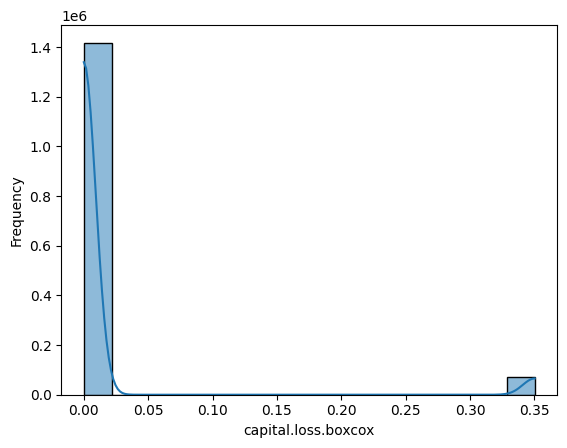

In [228]:
# Box-Cox 변환
from scipy import stats
transformed_data, lambda_value = stats.boxcox(df['capital.loss'].replace(0,1))
df['capital.loss.boxcox']=transformed_data
sns.histplot(df['capital.loss.boxcox'], kde=True, stat="frequency")

In [ ]:
ks_statistic, p_value = stats.kstest(df['capital.loss.boxcox'], 'norm')
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")
ad_statistic, critical_values, significance_level = stats.anderson(df['capital.loss.boxcox'], dist='norm')

print(f"AD Statistic: {ad_statistic}")

# 유의 수준에 따른 해석
for i in range(len(critical_values)):
    sig_level = significance_level[i]
    crit_val = critical_values[i]
    if ad_statistic < crit_val:
        print(f"At significance level {sig_level}, null hypothesis is not rejected (data follows normal distribution).")
    else:
        print(f"At significance level {sig_level}, null hypothesis is rejected (data does not follow normal distribution).")
# 정규분포 따르지않음
#큰차이없음

KS Statistic: 0.5, p-value: 0.0
AD Statistic: 11825.513311878734
At significance level 15.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 10.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 5.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 2.5, null hypothesis is rejected (data does not follow normal distribution).
At significance level 1.0, null hypothesis is rejected (data does not follow normal distribution).


### capital.diff 이상치 처리

In [229]:
#자본 이익과 자본 손실의 차인 순자본이익을 계산한다면 단순 자본이익이나 손실보다 수입을 더 예측할 수 있을 것

df['capital.diff'] = df['capital.gain'] - df['capital.loss']

In [230]:
# Box-Cox 변환
print(df['capital.diff'].min())
print(df['capital.diff'][df['capital.diff']<0])

-4356
39     -2057
44     -1977
57     -2559
83     -1564
108    -2392
        ... 
7491   -1602
7493   -1977
7505   -1887
7512   -1977
7540   -1408
Name: capital.diff, Length: 1519, dtype: int64


<Axes: xlabel='capital.diff.boxcox', ylabel='Frequency'>

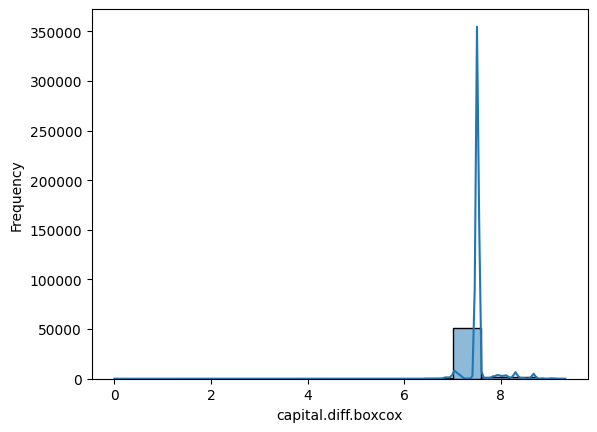

In [231]:
# Box-Cox 변환
transformed_data, lambda_value = stats.boxcox(df['capital.diff']+4357)
df['capital.diff.boxcox']=transformed_data
sns.histplot(df['capital.diff.boxcox'], kde=True, stat="frequency")

In [ ]:
ks_statistic, p_value = stats.kstest(df['capital.diff.boxcox'], 'norm')
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")
ad_statistic, critical_values, significance_level = stats.anderson(df['capital.diff.boxcox'], dist='norm')

print(f"AD Statistic: {ad_statistic}")

# 유의 수준에 따른 해석
for i in range(len(critical_values)):
    sig_level = significance_level[i]
    crit_val = critical_values[i]
    if ad_statistic < crit_val:
        print(f"At significance level {sig_level}, null hypothesis is not rejected (data follows normal distribution).")
    else:
        print(f"At significance level {sig_level}, null hypothesis is rejected (data does not follow normal distribution).")
# 정규분포 따르지않음
#큰차이없음

KS Statistic: 0.9999078574653651, p-value: 0.0
AD Statistic: 8449.819919839923
At significance level 15.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 10.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 5.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 2.5, null hypothesis is rejected (data does not follow normal distribution).
At significance level 1.0, null hypothesis is rejected (data does not follow normal distribution).


### hours.per.week 이상치 처리

<AxesSubplot:>

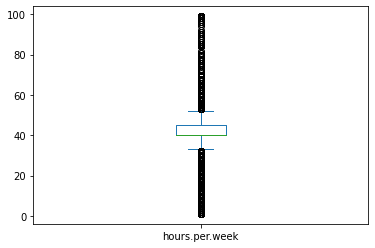

In [ ]:
df['hours.per.week'].plot.box()

<AxesSubplot:xlabel='hours.per.week', ylabel='Frequency'>

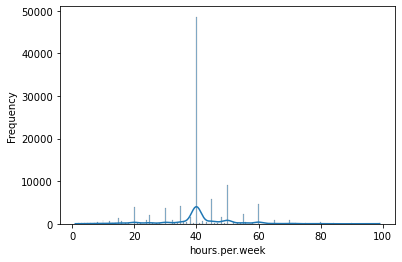

In [ ]:
sns.histplot(df['hours.per.week'], kde=True, stat="frequency")

<AxesSubplot:ylabel='Frequency'>

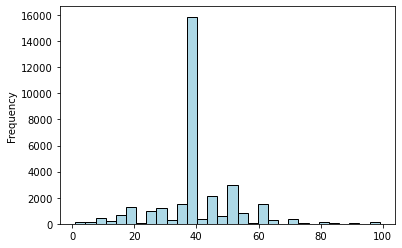

In [ ]:
df['hours.per.week'].plot.hist(bins=30,color='lightblue', edgecolor='black')

In [ ]:
ks_statistic, p_value = stats.kstest(df['hours.per.week'], 'norm')
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")
ad_statistic, critical_values, significance_level = stats.anderson(df['hours.per.week'], dist='norm')

print(f"AD Statistic: {ad_statistic}")

# 유의 수준에 따른 해석
for i in range(len(critical_values)):
    sig_level = significance_level[i]
    crit_val = critical_values[i]
    if ad_statistic < crit_val:
        print(f"At significance level {sig_level}, null hypothesis is not rejected (data follows normal distribution).")
    else:
        print(f"At significance level {sig_level}, null hypothesis is rejected (data does not follow normal distribution).")

KS Statistic: 0.9971735742973088, p-value: 0.0
AD Statistic: 1763.9255099085494
At significance level 15.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 10.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 5.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 2.5, null hypothesis is rejected (data does not follow normal distribution).
At significance level 1.0, null hypothesis is rejected (data does not follow normal distribution).


<Axes: xlabel='hours.per.week.boxcox', ylabel='Frequency'>

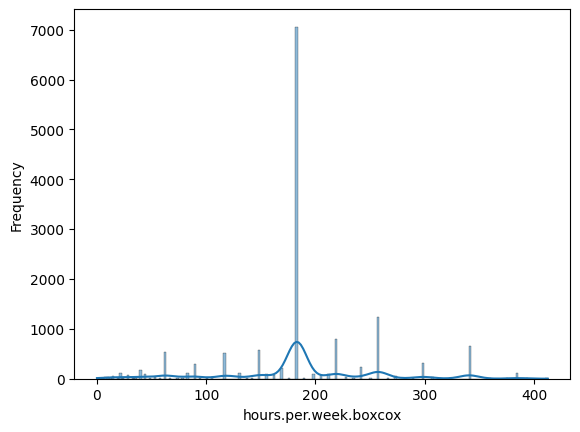

In [232]:
# Box-Cox 변환 (주 70시간 이상은 현실적으로 불가능이라 판단하여 중앙값으로 대치)
transformed_data, lambda_value = stats.boxcox(df['hours.per.week'].replace(range(70, 100), 40))
df['hours.per.week.boxcox']=transformed_data
sns.histplot(df['hours.per.week.boxcox'], kde=True, stat="frequency")

In [ ]:
ks_statistic, p_value = stats.kstest(df['hours.per.week.boxcox'], 'norm')
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")
ad_statistic, critical_values, significance_level = stats.anderson(df['hours.per.week.boxcox'], dist='norm')

print(f"AD Statistic: {ad_statistic}")

# 유의 수준에 따른 해석
for i in range(len(critical_values)):
    sig_level = significance_level[i]
    crit_val = critical_values[i]
    if ad_statistic < crit_val:
        print(f"At significance level {sig_level}, null hypothesis is not rejected (data follows normal distribution).")
    else:
        print(f"At significance level {sig_level}, null hypothesis is rejected (data does not follow normal distribution).")

KS Statistic: 0.997204409268686, p-value: 0.0
AD Statistic: 1788.0429494704877
At significance level 15.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 10.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 5.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 2.5, null hypothesis is rejected (data does not follow normal distribution).
At significance level 1.0, null hypothesis is rejected (data does not follow normal distribution).


In [233]:
df.drop(columns = ['hours.per.week', 'capital.gain', 'capital.loss', 'capital.diff'], inplace = True)

# age 정규화

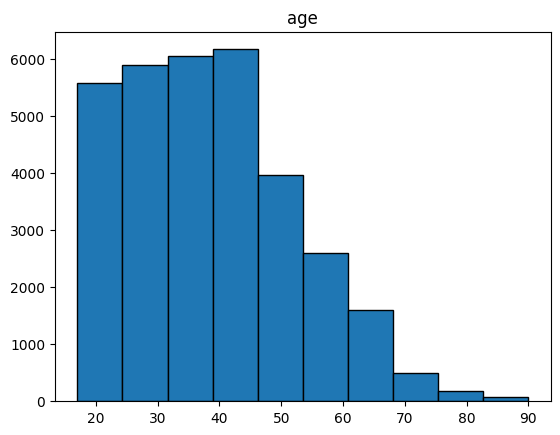

In [161]:
import matplotlib.pyplot as plt
plt.hist(df['age'], edgecolor = 'black')
plt.title('age')
plt.show()

In [187]:
ks_statistic, p_value = stats.kstest(df['age'], 'norm')
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")
ad_statistic, critical_values, significance_level = stats.anderson(df['age'], dist='norm')

print(f"AD Statistic: {ad_statistic}")

# 유의 수준에 따른 해석
for i in range(len(critical_values)):
    sig_level = significance_level[i]
    crit_val = critical_values[i]
    if ad_statistic < crit_val:
        print(f"At significance level {sig_level}, null hypothesis is not rejected (data follows normal distribution).")
    else:
        print(f"At significance level {sig_level}, null hypothesis is rejected (data does not follow normal distribution).")

KS Statistic: 1.0, p-value: 0.0
AD Statistic: 238.08301913676405
At significance level 15.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 10.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 5.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 2.5, null hypothesis is rejected (data does not follow normal distribution).
At significance level 1.0, null hypothesis is rejected (data does not follow normal distribution).


In [234]:
df['age'] = df['age'].replace(0, 1e-6)
df['age'] = np.log(df['age'])

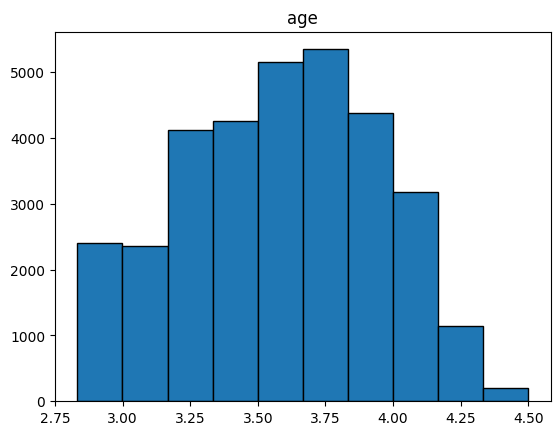

In [55]:
import matplotlib.pyplot as plt
plt.hist(df['age'], edgecolor = 'black')
plt.title('age')
plt.show()

In [ ]:
ks_statistic, p_value = stats.kstest(df['age'], 'norm')
print(f"KS Statistic: {ks_statistic}, p-value: {p_value}")
ad_statistic, critical_values, significance_level = stats.anderson(df['age'], dist='norm')

print(f"AD Statistic: {ad_statistic}")

# 유의 수준에 따른 해석
for i in range(len(critical_values)):
    sig_level = significance_level[i]
    crit_val = critical_values[i]
    if ad_statistic < crit_val:
        print(f"At significance level {sig_level}, null hypothesis is not rejected (data follows normal distribution).")
    else:
        print(f"At significance level {sig_level}, null hypothesis is rejected (data does not follow normal distribution).")

KS Statistic: 0.9976958690666098, p-value: 0.0
AD Statistic: 125.88317368821299
At significance level 15.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 10.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 5.0, null hypothesis is rejected (data does not follow normal distribution).
At significance level 2.5, null hypothesis is rejected (data does not follow normal distribution).
At significance level 1.0, null hypothesis is rejected (data does not follow normal distribution).


# 이상치

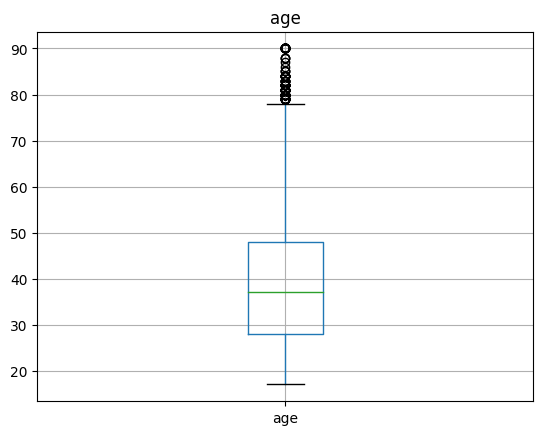

이상치 개수: 143


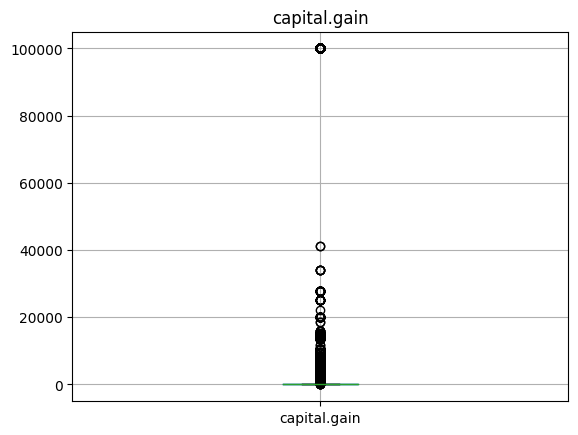

이상치 개수: 2712


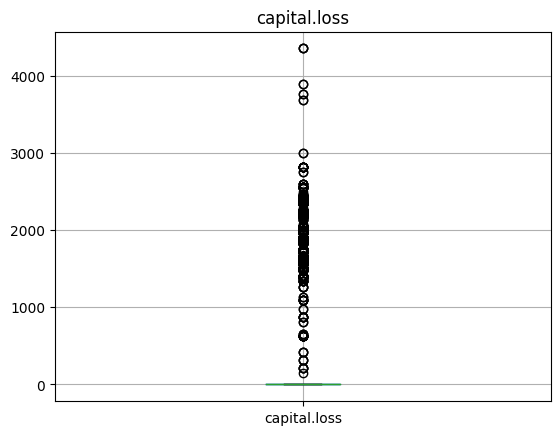

이상치 개수: 1519


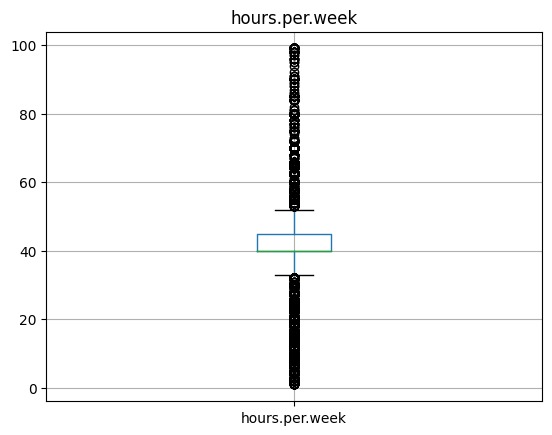

이상치 개수: 9008


In [ ]:
import matplotlib.pyplot as plt

num_col = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - IQR * 1.5
    up_bound = Q3 + IQR * 1.5
    outliers = df[(df[col] < low_bound) | (df[col] > up_bound)]
    df.boxplot(column = col)
    plt.title(col)
    plt.show()
    print("이상치 개수:",outliers.shape[0])

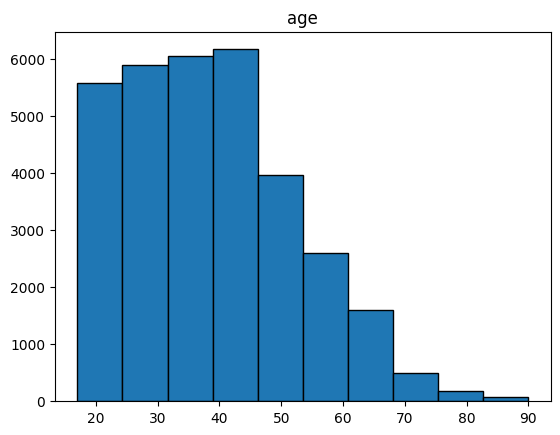

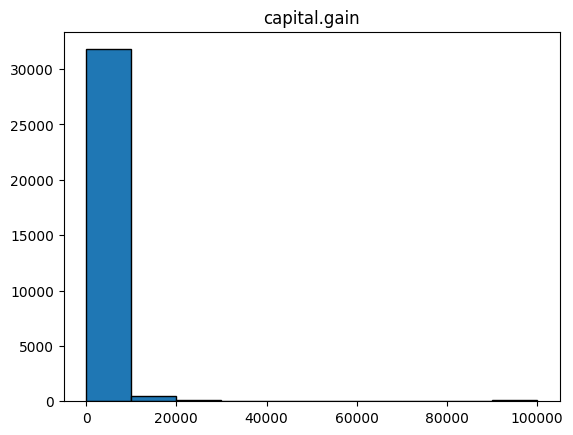

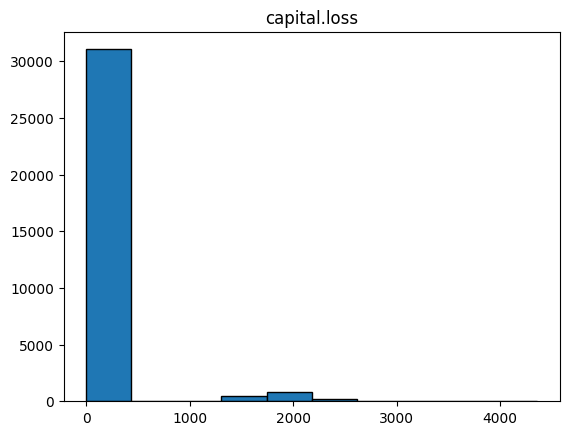

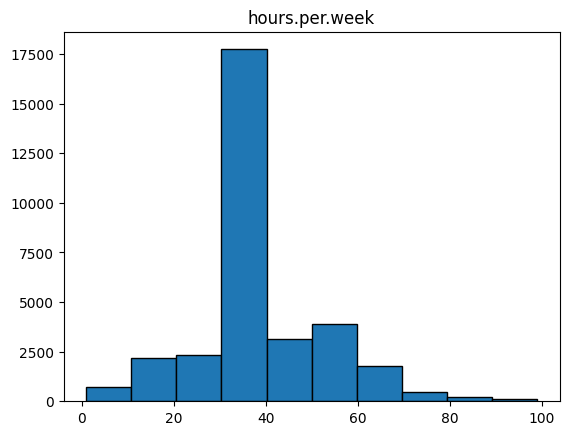

In [ ]:
for col in num_col:
    plt.hist(df[col], edgecolor = 'black')
    plt.title(col)
    plt.show()

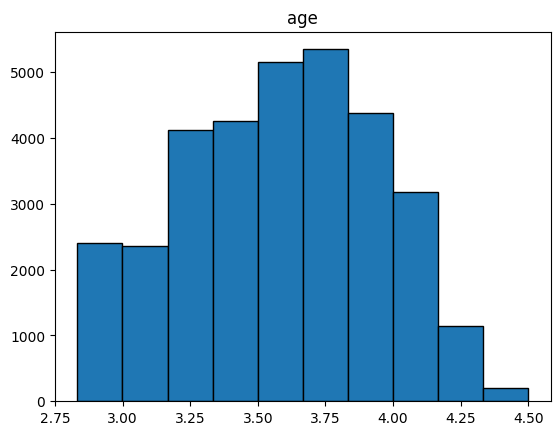

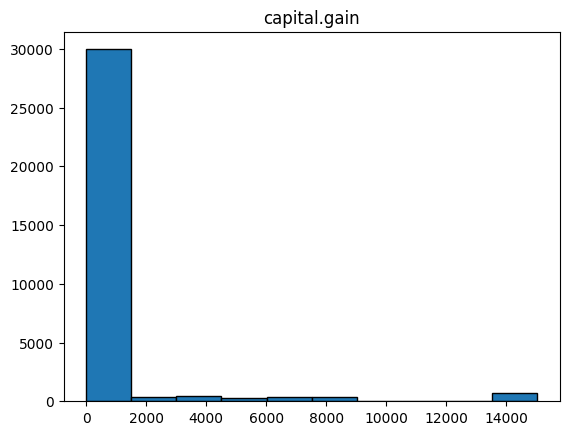

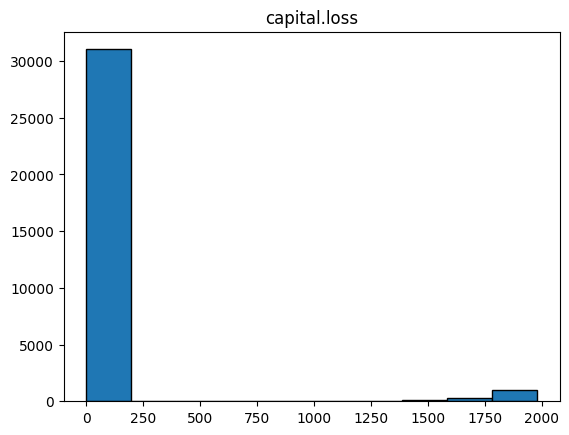

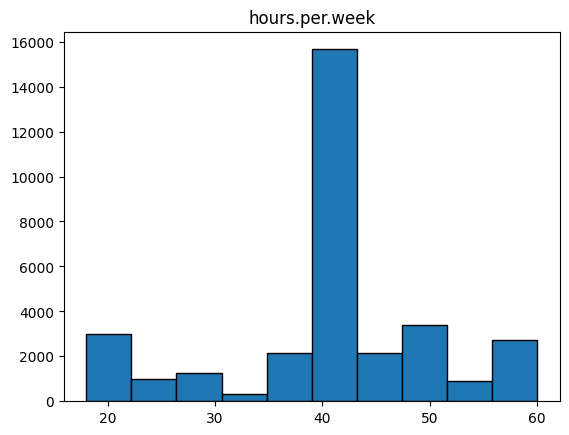

In [ ]:
from scipy.stats.mstats import winsorize
df['hours.per.week'] = winsorize(df['hours.per.week'], limits=[0.05, 0.05])


df['age'] = df['age'].replace(0, 1e-6)
df['age'] = np.log(df['age'])

gain_limit = df['capital.gain'].quantile(0.99)
loss_limit = df['capital.loss'].quantile(0.99)
# 상위 1%를 윈저화 처리
df['capital.gain'] = df['capital.gain'].clip(upper=gain_limit)
df['capital.loss'] = df['capital.loss'].clip(upper=loss_limit)

for col in num_col:
    plt.hist(df[col], edgecolor = 'black')
    plt.title(col)
    plt.show()

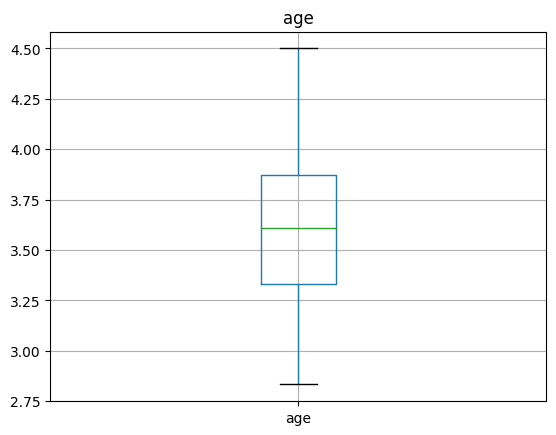

이상치 개수: 0


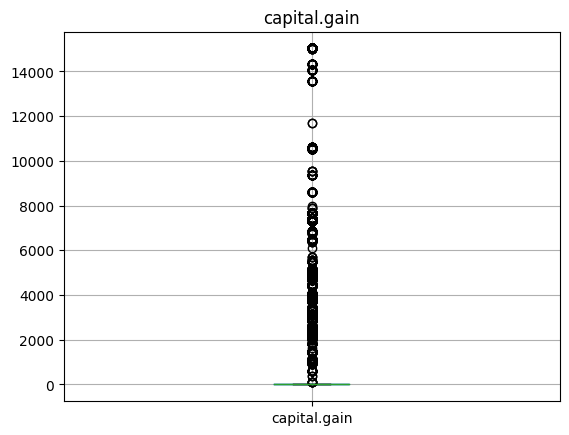

이상치 개수: 2712


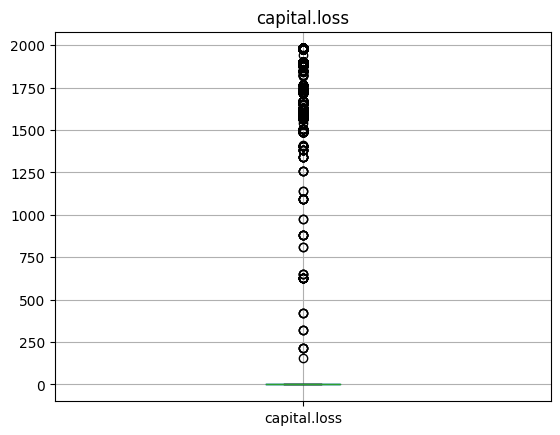

이상치 개수: 1519


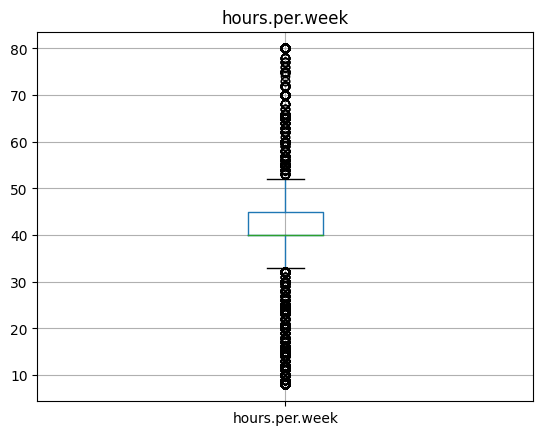

이상치 개수: 9008


In [ ]:
import matplotlib.pyplot as plt

num_col = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - IQR * 1.5
    up_bound = Q3 + IQR * 1.5
    outliers = df[(df[col] < low_bound) | (df[col] > up_bound)]
    df.boxplot(column = col)
    plt.title(col)
    plt.show()
    print("이상치 개수:",outliers.shape[0])

# 결측치

In [235]:
# workclass와 occupation이 모두 null이고, income이 1인 경우
df.loc[(df['workclass'].isnull()) & (df['occupation'].isnull()) & (df['income'] == 1), ['workclass', 'occupation']] = ['Private', 'Exec-managerial']

# workclass와 occupation이 모두 null이고, income이 0인 경우
df.loc[(df['workclass'].isnull()) & (df['occupation'].isnull()) & (df['income'] == 0), ['workclass', 'occupation']] = ['Private', 'Other-service']

In [236]:
indices_to_update = [23283, 23615, 23860, 24209, 24396, 24999, 25001]

df.loc[df.index.isin(indices_to_update), ['workclass', 'occupation']] = ['Private', 'Other-service']

In [237]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
fill = df.copy()
fill = fill.drop(columns=['income'])

# 1. LabelEncoder로 범주형 데이터를 수치형으로 변환
categorical_columns = fill.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('native.country')
for column in categorical_columns:
    column_encoded = column + '_encoded'
    le = LabelEncoder()
    fill[column_encoded] = le.fit_transform(fill[column])

le_native_country = LabelEncoder()
fill['native.country_encoded'] = le_native_country.fit_transform(fill['native.country'].fillna('missing'))  # target의 결측치에는 'missing'으로 대체

# 2. 결측치가 없는 데이터로 학습하기 위해 데이터 분할
num_column = fill.select_dtypes(include=['int']).columns
train_data = fill.loc[fill['native.country'].notna(), num_column]
test_data = fill.loc[fill['native.country'].isna(), num_column]

X_train = train_data.drop(columns=['native.country_encoded'])
y_train = train_data['native.country_encoded']
X_test = test_data.drop(columns=['native.country_encoded'])

# 3. 랜덤포레스트 모델로 결측치 학습 및 예측
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 4. 예측된 값을 target_encoded에 채워 넣기
fill.loc[fill['native.country'].isna(), 'native.country_encoded'] = y_pred

# 5. LabelEncoder를 사용해 다시 문자형 값으로 변환
fill['native.country'] = le_native_country.inverse_transform(fill['native.country_encoded'].astype(int))
df['native.country'] = fill['native.country']

# 그룹화 및 제거

**feature 제거**

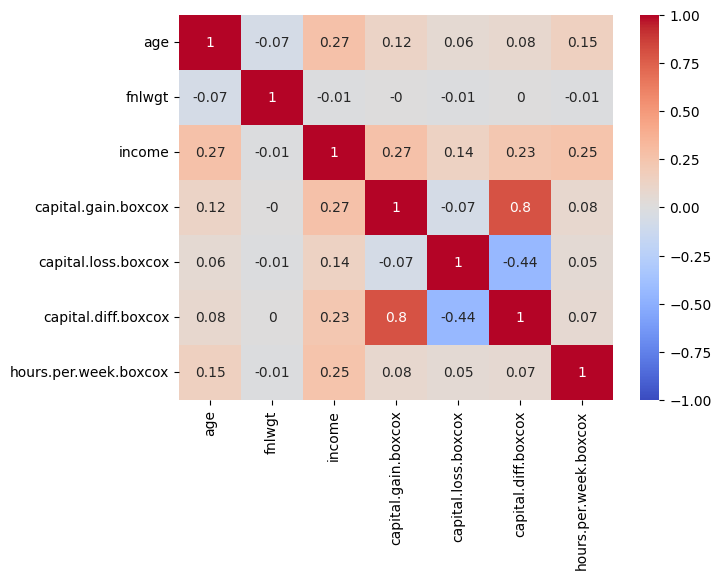

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr().round(2)
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.show()

In [238]:
df = df.drop(columns=['fnlwgt'])

**그룹화**

In [ ]:
import plotly.express as px

income_ratio = df.groupby(['relationship', 'income']).size().reset_index(name='count')


fig = px.bar(income_ratio, x='relationship', y='count', color='income',
             barmode='group', text='count', title="Income Proportion by Relationship",
             labels={'income': 'Income Level', 'count': 'Count', 'relationship': 'Relationship'})

fig.show()

In [239]:
def classify_relationship(relationship):
    if relationship in ['Husband', 'Wife']:
        return '기혼'
    elif relationship in ['Other-relative', 'Own-child']:
        return '가족'
    else:
        return '비가족'

df['relationship'] = df['relationship'].apply(classify_relationship)

In [ ]:
import plotly.express as px

income_ratio = df.groupby(['marital.status', 'income']).size().reset_index(name='count')

fig = px.bar(income_ratio, x='marital.status', y='count', color='income',
             barmode='group', title="Income Proportion by marital status",
             labels={'income': 'Income Level', 'count': 'Count', 'marital.status': 'marital status'})

fig.show()

In [240]:
def classify_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-AF-spouse']:
        return '결혼'
    elif status == 'Never-married':
        return '미혼'
    else:
        return '기타'

df['marital.status'] = df['marital.status'].apply(classify_marital_status)

In [241]:
#native country 중 소득이 1인 비율을 따진 후, 순위를 매겨 그룹화
target_ratio = df[df['income'] == 1].groupby('native.country').size() / df.groupby('native.country').size()
q25 = target_ratio.quantile(0.25)
q50 = target_ratio.quantile(0.50)
q75 = target_ratio.quantile(0.75)

# 국가를 상위 25%, 50%, 75%, 100%로 분류
def classify_country(country):
    ratio = target_ratio.get(country, 0)  # 해당 국가의 타깃 비율을 가져옴 (없으면 0)
    if ratio <= q25:
        return 'Top 100-75%'
    elif ratio <= q50:
        return 'Top 75-50%'
    elif ratio <= q75:
        return 'Top 50-25%'
    else:
        return 'Top 25-0%'

# 새로운 컬럼 추가
df['native.country'] = df['native.country'].apply(classify_country)

**Encoding**

In [242]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
df_label = df.copy()

for column in categorical_columns:
    le = LabelEncoder()
    df_label[column] = le.fit_transform(df_label[column])

**Scaling**

In [243]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'capital.gain.boxcox', 'capital.loss.boxcox', 'capital.diff.boxcox','hours.per.week.boxcox']
scaler = StandardScaler()
df_label[numeric_cols] = scaler.fit_transform(df_label[numeric_cols])

In [244]:
#원래대로 train, test 세트 분할 및 타겟값 분할

X_train = df_label.iloc[:train.shape[0],:].copy().drop(columns=['income'])
X_test  = df_label .iloc[train.shape[0]:,:].copy().drop(columns=['income'])
y_train = train['income'].copy()
y_test = test['income'].copy()

# 모델링

In [23]:
! pip install xgboost
! pip install lightgbm
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier             # 1. K-Nearest Neighbor(KNN)
from sklearn.linear_model import LogisticRegression            # 2. Logistic Regression
from sklearn.svm import SVC                                    # 3. SVC
from sklearn.tree import DecisionTreeClassifier                # 4. Decision Tree
from sklearn.ensemble import RandomForestClassifier            # 5. Random Forest
from sklearn.ensemble import ExtraTreesClassifier              # 6. Extra Tree
from sklearn.ensemble import GradientBoostingClassifier        # 7. GBM
from sklearn.naive_bayes import GaussianNB                     # 8. GaussianNB
from xgboost import XGBClassifier                              # 9. XGBoost
from lightgbm import LGBMClassifier                            # 10. LightGBM

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# knn_model = KNeighborsClassifier()
# logreg_model = LogisticRegression()
# svc_model = SVC()
decision_model = DecisionTreeClassifier()
random_model = RandomForestClassifier()
extra_model = ExtraTreesClassifier()
gbm_model = GradientBoostingClassifier()
# nb_model = GaussianNB()
xgb_model = XGBClassifier(eval_metric='logloss')
lgbm_model = LGBMClassifier    (verbose = -1)

models = [
    # knn_model,
    # logreg_model,
    # svc_model,
    decision_model,
    random_model,
    extra_model,
    gbm_model,
    # nb_model,
    xgb_model,
    lgbm_model
]

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
results = dict()

for alg in models:
    alg.fit(X_train, y_train)
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='accuracy')
    results[alg.__class__.__name__] = np.mean(score)*100

In [245]:
from sklearn.metrics import accuracy_score
lgbm_model = LGBMClassifier(verbose = -1)
xgb_model = XGBClassifier(eval_metric='logloss')
random_model = RandomForestClassifier()
decision_model = DecisionTreeClassifier()
extra_model = ExtraTreesClassifier()

lgbm_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = lgbm_model.predict(X_test)
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8691155019228219

In [213]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [10, 20, 30],
    'min_data_in_leaf' : [20, 30, 50],
    'max_depth': [7, 10, 13],
    'learning_rate': [0.05],
    'n_estimators': [100, 300, 500],
    'bagging_fraction': [0.8, 0.9],
    'feature_fraction': [0.8, 0.9]
}

grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 정확도:", grid_search.best_score_)

최적의 하이퍼파라미터: {'bagging_fraction': 0.8, 'feature_fraction': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'min_data_in_leaf': 30, 'n_estimators': 300, 'num_leaves': 30}
최적의 정확도: 0.877418065547562


In [248]:
params = {
    'num_leaves': 30,
    'max_depth': 7,
    'learning_rate': 0.05,
    'n_estimators': 300,
    'min_child_weight' : 1,
    'min_data_in_leaf' : 30,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8
}

lgbm_model = LGBMClassifier(**params, verbose = -1)

lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.869513327144941

In [222]:
lgbm_model_importance = pd.DataFrame({'Feature':X_train.columns, 'lgbm_model':lgbm_model.feature_importances_})
lgbm_imp = lgbm_model_importance.sort_values(by='lgbm_model', ascending=False)
lgbm_imp

,Feature,lgbm_model
0,age,1602
4,occupation,1147
2,education,948
12,hours.per.week.boxcox,899
9,capital.gain.boxcox,793
11,capital.diff.boxcox,545
1,workclass,522
10,capital.loss.boxcox,477
3,marital.status,315
6,race,223


In [224]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 예측값과 실제값
y_pred = lgbm_model.predict(X_test)  # 예측값
y_prob = lgbm_model.predict_proba(X_test)[:, 1]  # 양성일 확률 (ROC-AUC 계산용)

# 각 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# 결과 출력
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'ROC-AUC: {roc_auc:.3f}')

Accuracy: 0.871
Precision: 0.784
Recall: 0.671
F1-Score: 0.723
ROC-AUC: 0.927
